In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
     

In [35]:
!gdown 1oH01Keho3C2O91uKasRjz1c4l16mrV7g

Downloading...
From: https://drive.google.com/uc?id=1oH01Keho3C2O91uKasRjz1c4l16mrV7g
To: /content/bank-data.zip
100% 516k/516k [00:00<00:00, 92.6MB/s]


In [36]:
!unzip -o bank-data.zip
bankdata = pd.read_csv("bank-data/bank-full.csv", delimiter=';')
bankdata
     

Archive:  bank-data.zip
  inflating: __MACOSX/._bank-data    
  inflating: bank-data/.DS_Store     
  inflating: __MACOSX/bank-data/._.DS_Store  
  inflating: bank-data/bank-full.csv  
  inflating: __MACOSX/bank-data/._bank-full.csv  


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [37]:
bankdata.shape
bankdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [38]:
itemFeatures = [feature for feature in bankdata.columns if ((bankdata[feature].dtypes=='O')&(feature not in ['y']))]
itemFeatures
for feature in itemFeatures:
    print('Feature: {} --> Total Unique Number: {}'.format(feature,len(bankdata[feature].unique())))
     

Feature: job --> Total Unique Number: 12
Feature: marital --> Total Unique Number: 3
Feature: education --> Total Unique Number: 4
Feature: default --> Total Unique Number: 2
Feature: housing --> Total Unique Number: 2
Feature: loan --> Total Unique Number: 2
Feature: contact --> Total Unique Number: 3
Feature: month --> Total Unique Number: 12
Feature: poutcome --> Total Unique Number: 4


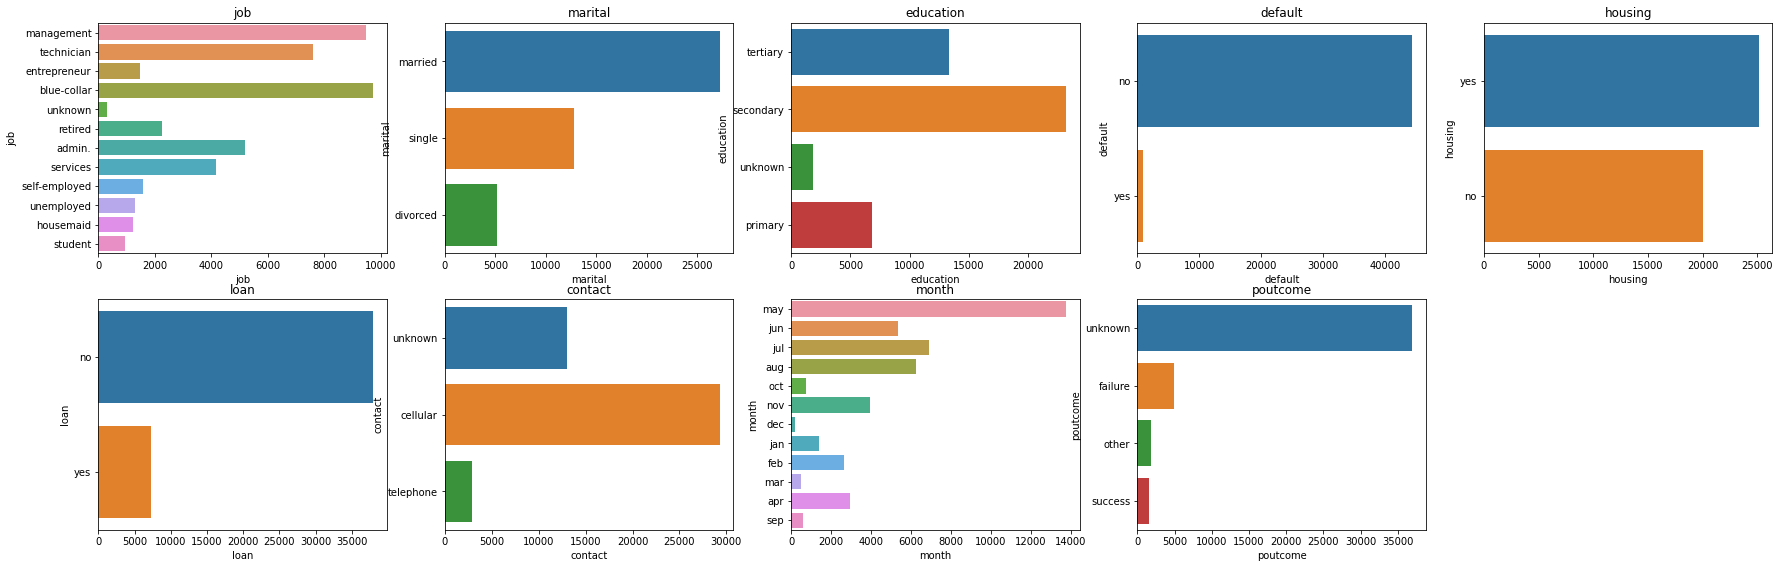

In [40]:
plt.figure(figsize=(30,50))
plotnumber =1
for itemFeature in itemFeatures:
    ax = plt.subplot(10,5,plotnumber)
    sns.countplot(y=itemFeature,data=bankdata)
    plt.xlabel(itemFeature)
    plt.title(itemFeature)
    plotnumber+=1
plt.show()

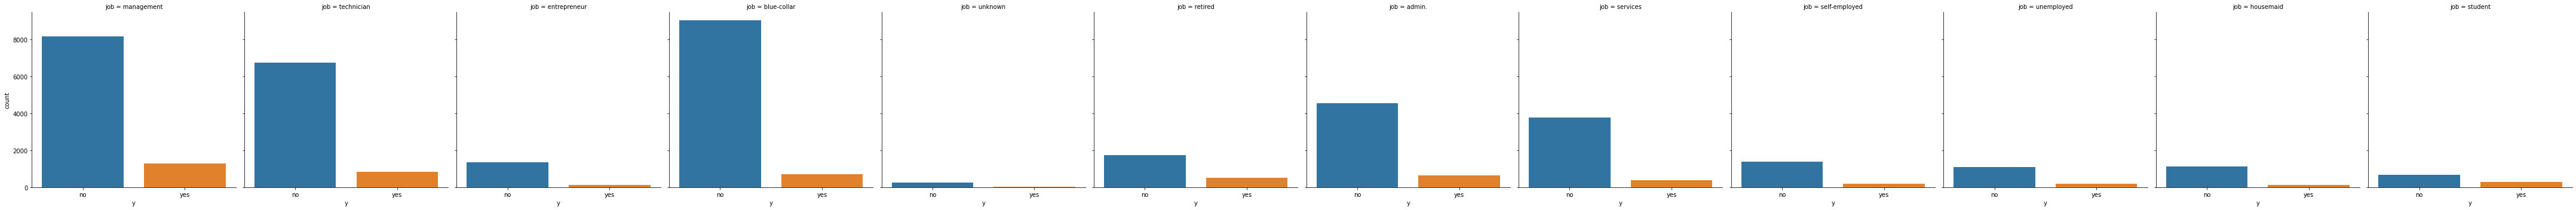

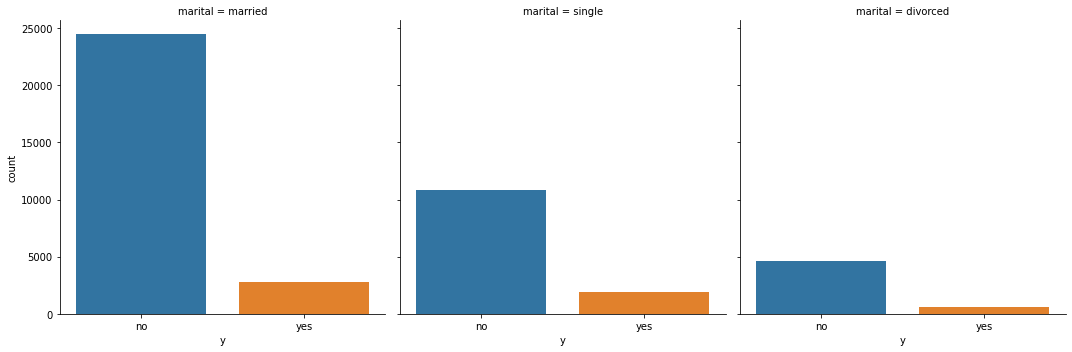

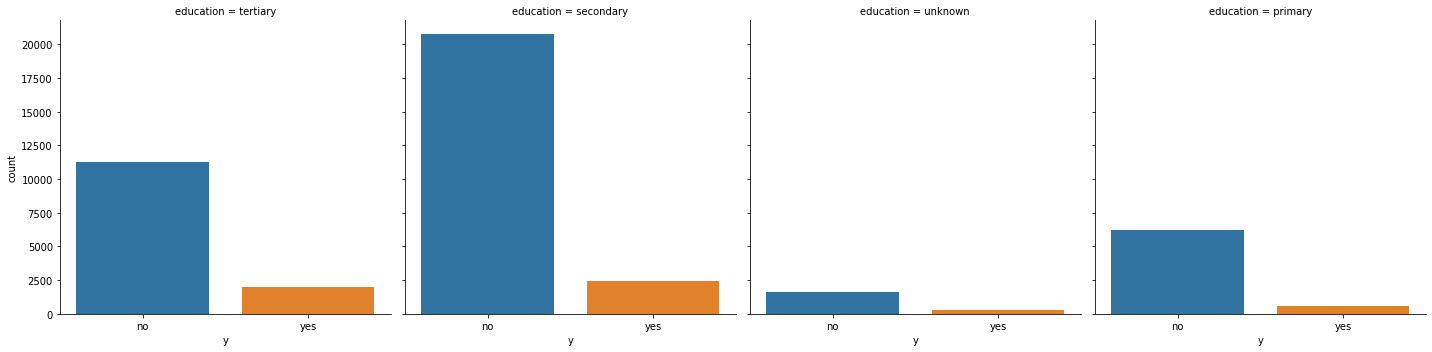

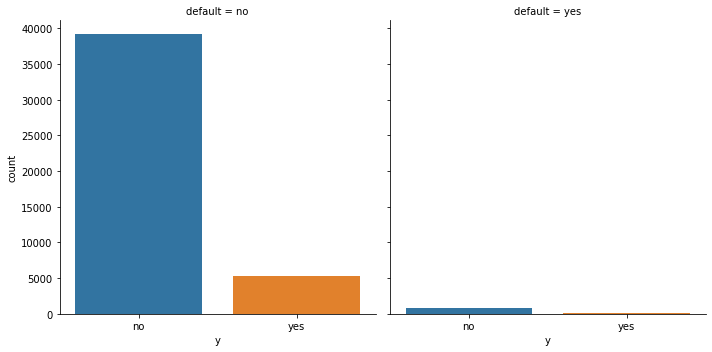

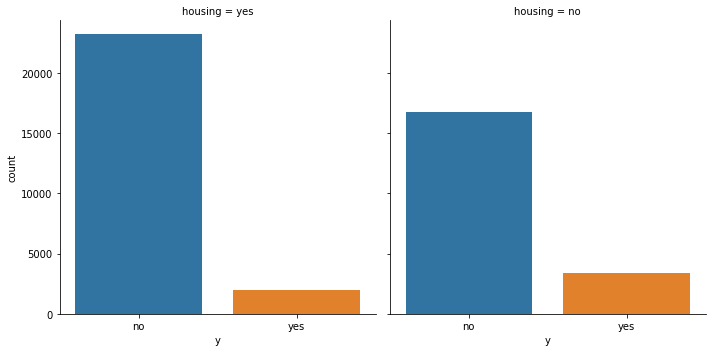

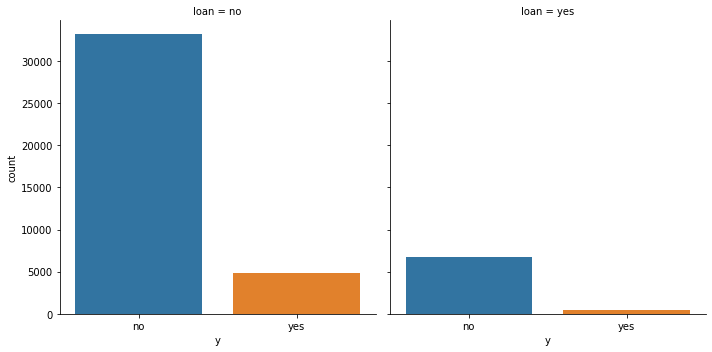

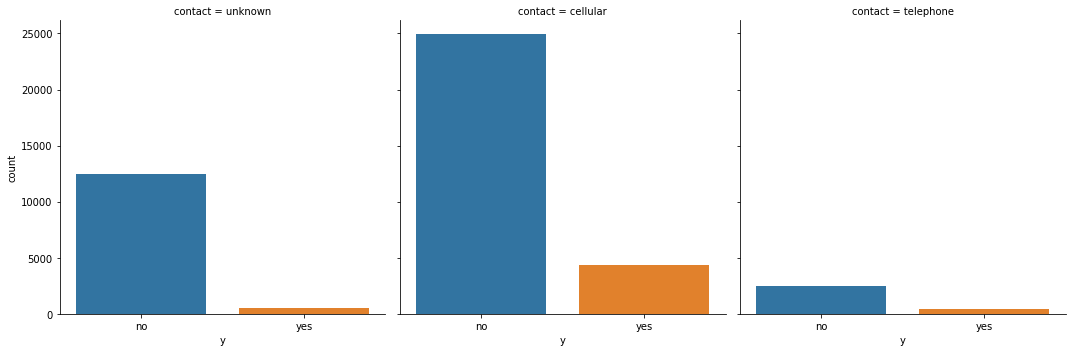

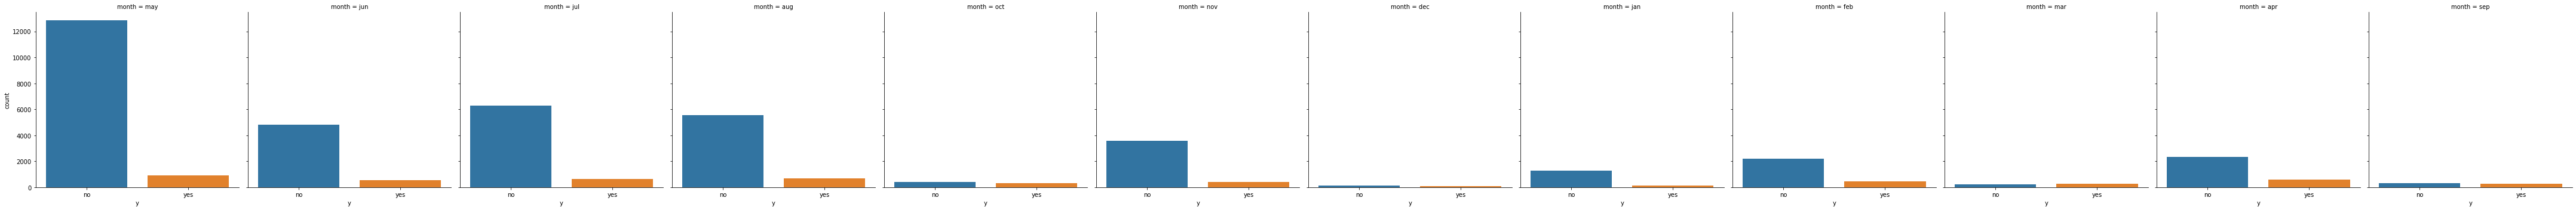

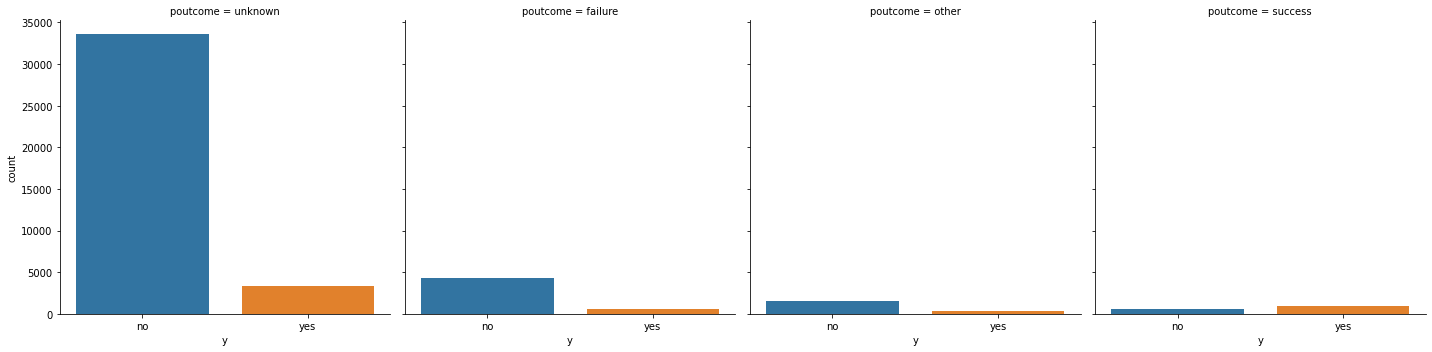

In [41]:
for itemFeature in itemFeatures:
    sns.catplot(x='y', col=itemFeature, kind='count', data  = bankdata)
plt.show()

In [42]:
Features = [feature for feature in bankdata.columns if ((bankdata[feature].dtypes!='O')&(feature not in ['y']))]


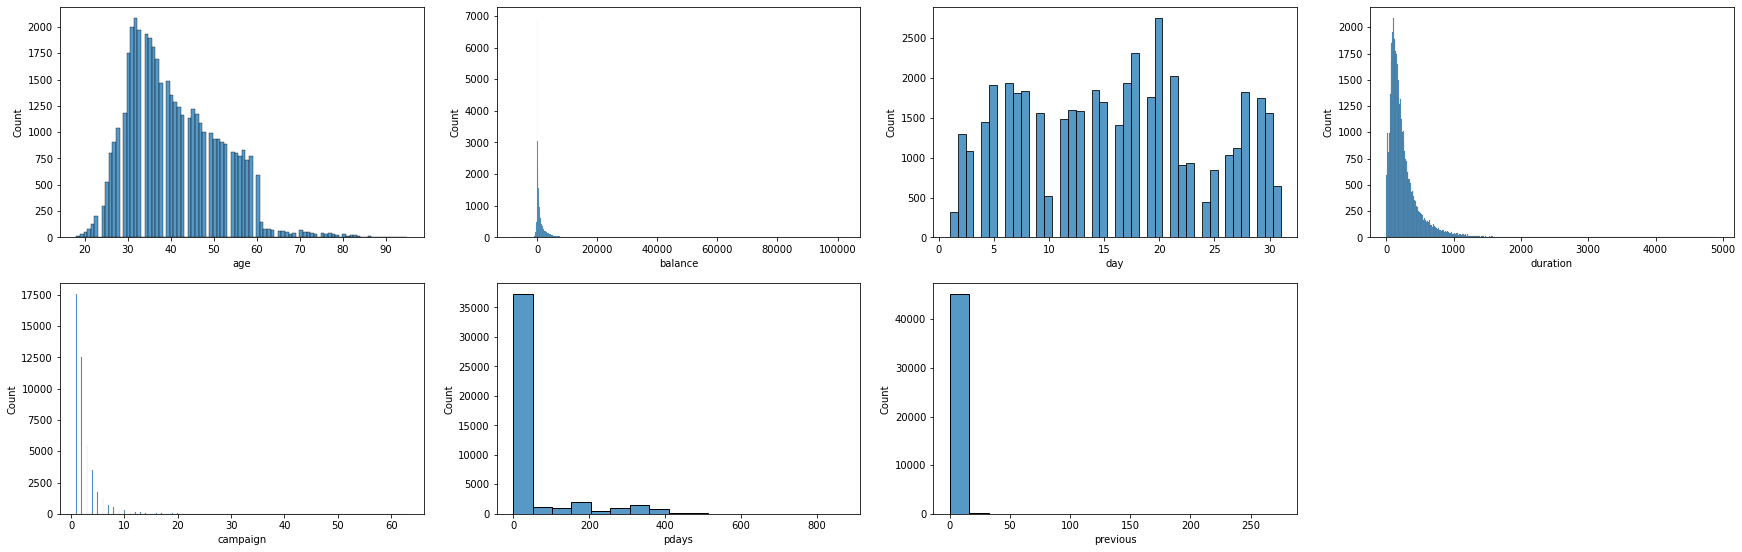

In [44]:
plt.figure(figsize=(30,50))
plotnumber =1
for itemFeature in Features:
    ax = plt.subplot(10,4,plotnumber)
    sns.histplot(bankdata[itemFeature])
    plt.xlabel(itemFeature)
    plotnumber+=1
plt.show()

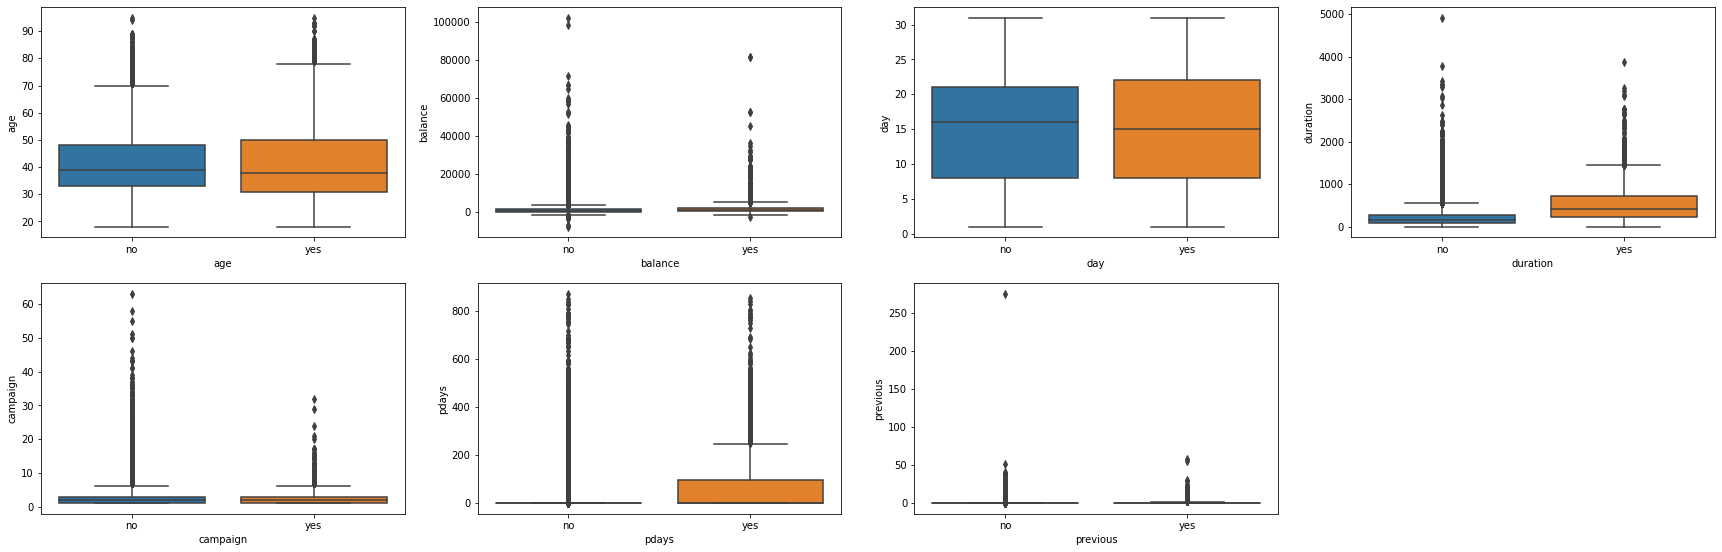

In [45]:
plt.figure(figsize=(30,50))
plotnumber =1
for itemFeature in Features:
    ax = plt.subplot(10,4,plotnumber)
    sns.boxplot(x='y', y=bankdata[itemFeature], data = bankdata)
    plt.xlabel(itemFeature)
    plotnumber+=1
plt.show()

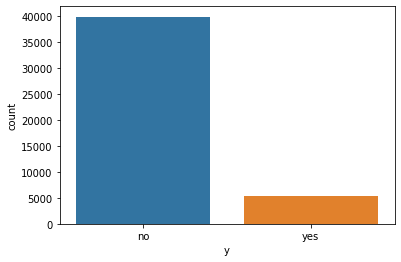

In [46]:
sns.countplot(x='y',data=bankdata)
plt.show()

In [47]:
bankdata['y'].groupby(bankdata['y']).count()


y
no     39922
yes     5289
Name: y, dtype: int64

In [48]:
bankdata2 =bankdata.copy()
bankdata2.shape
bankdata2.groupby(['y','default']).size()
bankdata2.drop(['default'],axis=1, inplace=True)
bankdata2.groupby(['y','pdays']).size()
bankdata2.drop(['pdays'],axis=1, inplace=True)



In [49]:
groupColumn = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  groupColumn:
    bankdata2 = pd.concat([bankdata2.drop(col, axis=1),pd.get_dummies(bankdata2[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [50]:
boolColumns = ['housing', 'loan', 'y']
for col in  boolColumns:
    bankdata2[col+'New']=bankdata2[col].apply(lambda x : 1 if x == 'yes' else 0)
    bankdata2.drop(col, axis=1, inplace=True)
     

In [51]:

X = bankdata2.drop(['yNew'],axis=1)
Y = bankdata2['yNew']
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.2, random_state=0)
print(" For Training bankdata =",len(trainX), "\n For Testing bankdata =",len(testX))

 For Training bankdata = 36168 
 For Testing bankdata = 9043


In [52]:
modelSVC= LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001,C=0.55, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=42, max_iter=2000)


In [53]:
modelSVC.fit(trainX,trainY)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.55, max_iter=2000, random_state=42)

In [54]:
predictY=modelSVC.predict(testX)

print(accuracy_score(testY,predictY))
print(confusion_matrix(testY,predictY))
print(classification_report(testY,predictY,digits=5))

0.8489439345349995
[[7491  489]
 [ 877  186]]
              precision    recall  f1-score   support

           0    0.89520   0.93872   0.91644      7980
           1    0.27556   0.17498   0.21404      1063

    accuracy                        0.84894      9043
   macro avg    0.58538   0.55685   0.56524      9043
weighted avg    0.82236   0.84894   0.83388      9043



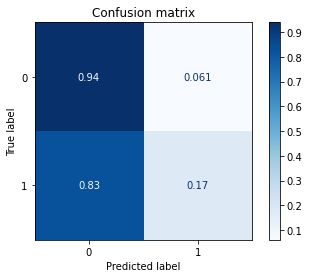

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay.from_estimator(modelSVC, testX, testY, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion matrix')
plt.show(matrix)
plt.show()

In [57]:
y_pred = modelSVC.predict(testX)
accuracy = accuracy_score(testY, predictY) * 100.0
print("Accuracy for the SVM is : ",accuracy)

Accuracy for the SVM is :  84.89439345349994
